# Walmart sales: cleaning the dataset 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Load the data using pandas

In [2]:
data = pd.read_csv('data/walmart_dataset.csv', parse_dates=['Date'])
data.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
1,35,B,103681,2010-02-05,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,False,3,14612.19
2,35,B,103681,2010-02-05,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,False,4,26323.15
3,35,B,103681,2010-02-05,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,False,5,36414.63
4,35,B,103681,2010-02-05,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,False,6,11437.81


In [3]:
pd.DataFrame(data.dtypes, columns=['Type'])

,Type
Store,int64
Type,object
Size,int64
Date,datetime64[ns]
Temperature,float64
Fuel_Price,float64
MarkDown1,float64
MarkDown2,float64
MarkDown3,float64
MarkDown4,float64


Add two new columns containing the number of the week and the year.

In [4]:
data['Week'] = data.Date.dt.week
data['Day'] = data.Date.dt.day
data['Month'] = data.Date.dt.month
data['Year'] = data.Date.dt.year
data.head()

<ipython-input-4-042af9fb56e8>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['Week'] = data.Date.dt.week


,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Week,Day,Month,Year
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,5,5,2,2010
1,35,B,103681,2010-02-05,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,False,3,14612.19,5,5,2,2010
2,35,B,103681,2010-02-05,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,False,4,26323.15,5,5,2,2010
3,35,B,103681,2010-02-05,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,False,5,36414.63,5,5,2,2010
4,35,B,103681,2010-02-05,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,False,6,11437.81,5,5,2,2010


### Count the unique values of the columns Store, Type, Department and IsHoliday

Count the unique values of the columns Store, Type, Department and IsHoliday, which are the columns with categorical data. Then obtain the percentage of the values over the total of registers in the dataset.

In [5]:
store_counts = (data['Store']
                .value_counts()
                .sort_index()
                .to_frame(name="Count")
                .reset_index()
                .rename(columns= {'index': 'Store'}))
store_counts['Percent'] = (store_counts['Count'] / store_counts['Count'].sum()) * 100
store_counts

,Store,Count,Percent
0,1,10244,2.429964
1,2,10238,2.428541
2,3,9036,2.143416
3,4,10272,2.436606
4,5,8999,2.134640
5,6,10211,2.422136
6,7,9762,2.315630
7,8,9895,2.347178
8,9,8867,2.103328
9,10,10315,2.446806


In [6]:
print("Store with more registers:\n", store_counts.iloc[store_counts['Percent'].idxmax()], "\n")
print("Store with more registers:\n", store_counts.iloc[store_counts['Percent'].idxmin()])

Store with more registers:
 Store         13.000000
Count      10474.000000
Percent        2.484522
Name: 12, dtype: float64 

Store with more registers:
 Store        36.000000
Count      6222.000000
Percent       1.475911
Name: 35, dtype: float64


In [7]:
type_counts = pd.DataFrame(data['Type']
                .value_counts()
                .sort_index()
                .to_frame(name="Count")
                .reset_index()
                .rename(columns= {'index': 'Type'}))
type_counts['Percent'] = (type_counts['Count'] / type_counts['Count'].sum()) * 100
type_counts

,Type,Count,Percent
0,A,215478,51.113220
1,B,163495,38.782409
2,C,42597,10.104372


In [8]:
print("Type with more registers:\n", type_counts.iloc[type_counts['Percent'].idxmax()], "\n")
print("Type with more registers:\n", type_counts.iloc[type_counts['Percent'].idxmin()])

Type with more registers:
 Type             A
Count       215478
Percent    51.1132
Name: 0, dtype: object 

Type with more registers:
 Type             C
Count        42597
Percent    10.1044
Name: 2, dtype: object


In [9]:
dept_counts = pd.DataFrame(data['Dept']
                .value_counts()
                .sort_index()
                .to_frame(name="Count")
                .reset_index()
                .rename(columns= {'index': 'Dept'}))
dept_counts['Percent'] = (dept_counts['Count'] / dept_counts['Count'].sum()) * 100
dept_counts

,Dept,Count,Percent
0,1,6435,1.526437
1,2,6435,1.526437
2,3,6435,1.526437
3,4,6435,1.526437
4,5,6347,1.505563
...,...,...,...
76,95,6435,1.526437
77,96,4854,1.151410
78,97,6278,1.489195
79,98,5836,1.384349


In [10]:
print("Department with more registers:\n", dept_counts.iloc[dept_counts['Percent'].idxmax()], "\n")
print("Department with more registers:\n", dept_counts.iloc[dept_counts['Percent'].idxmin()])

Department with more registers:
 Dept          1.000000
Count      6435.000000
Percent       1.526437
Name: 0, dtype: float64 

Department with more registers:
 Dept       43.000000
Count      12.000000
Percent     0.002847
Name: 41, dtype: float64


In [11]:
holiday_counts = (data['IsHoliday']
                .value_counts()
                .sort_index()
                .to_frame(name="Count")
                .reset_index()
                .rename(columns= {'index': 'IsHoliday'}))
holiday_counts['Percent'] = (holiday_counts['Count'] / holiday_counts['Count'].sum()) * 100
holiday_counts

,IsHoliday,Count,Percent
0,False,391909,92.964158
1,True,29661,7.035842


In [12]:
print("IsHoliday with more registers:\n", holiday_counts.iloc[holiday_counts['Percent'].idxmax()], "\n")
print("IsHoliday with more registers:\n", holiday_counts.iloc[holiday_counts['Percent'].idxmin()])

IsHoliday with more registers:
 IsHoliday      False
Count         391909
Percent      92.9642
Name: 0, dtype: object 

IsHoliday with more registers:
 IsHoliday       True
Count          29661
Percent      7.03584
Name: 1, dtype: object


### Count the missing values in the markdown columns

Count the quantity of missing values from the markdown columns and their percentage over the total of registers. As more of the 60% of the data from all markdown columns are missing, this columns can be discarded as they won't be useful.

In [13]:
cols = (data.isnull().sum(axis=0)/len(data)).sort_values(ascending=False).index

null_count = data.isnull().sum(axis=0)
null_percent = null_count/len(data) * 100

null_data = pd.concat([null_count, null_percent], axis=1)
null_data = null_data.rename(columns={0: 'Null count', 1: 'Null percent'})
null_data = null_data[null_data['Null count']!=0]
null_data

,Null count,Null percent
MarkDown1,270889,64.257181
MarkDown2,310322,73.611025
MarkDown3,284479,67.480845
MarkDown4,286603,67.984676
MarkDown5,270138,64.079038


Drop the markdown columns as they are unsuseful.

In [14]:
data = data.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1)

In [15]:
data.columns

Index(['Store', 'Type', 'Size', 'Date', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'IsHoliday', 'Dept', 'Weekly_Sales', 'Week', 'Day',
       'Month', 'Year'],
      dtype='object')

We then transform the boolean colunm IsHoliday to numeric values, 0 for False and 1 for True.

In [16]:
data['IsHoliday'] = data['IsHoliday'].apply(lambda x: 1 if x == True else 0)
data['IsHoliday'].unique()

array([0, 1])

We validate the consistency of the data, weekly sales can't be negative, but temperature can.

In [17]:
data.describe()

,Store,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Week,Day,Month,Year
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,136727.915739,60.090059,3.361027,171.201947,7.960289,0.070358,44.260317,15981.258123,25.826762,15.673131,6.449510,2010.968591
std,12.785297,60980.583328,18.447931,0.458515,39.159276,1.863296,0.255750,30.492054,22711.183519,14.151887,8.753549,3.243217,0.796876
min,1.000000,34875.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,1.000000,-4988.940000,1.000000,1.000000,1.000000,2010.000000
25%,11.000000,93638.000000,46.680000,2.933000,132.022667,6.891000,0.000000,18.000000,2079.650000,14.000000,8.000000,4.000000,2010.000000
50%,22.000000,140167.000000,62.090000,3.452000,182.318780,7.866000,0.000000,37.000000,7612.030000,26.000000,16.000000,6.000000,2011.000000
75%,33.000000,202505.000000,74.280000,3.738000,212.416993,8.572000,0.000000,74.000000,20205.852500,38.000000,23.000000,9.000000,2012.000000
max,45.000000,219622.000000,100.140000,4.468000,227.232807,14.313000,1.000000,99.000000,693099.360000,52.000000,31.000000,12.000000,2012.000000


In [18]:
print('Total of weeks with negative sales')
data.loc[data.Weekly_Sales<0].shape

Total of weeks with negative sales


(1285, 15)

In [19]:
data = data.loc[data.Weekly_Sales>0].reset_index(drop=True)

We apply dummy variables to encode the type of the store, because the type doesn't have hierarchy and we need to convert from char to integer.

In [20]:
data = pd.get_dummies(data)

In [21]:
data.columns

Index(['Store', 'Size', 'Date', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'IsHoliday', 'Dept', 'Weekly_Sales', 'Week', 'Day',
       'Month', 'Year', 'Type_A', 'Type_B', 'Type_C'],
      dtype='object')

We make plot the correlation of the variables to see the relation between them.

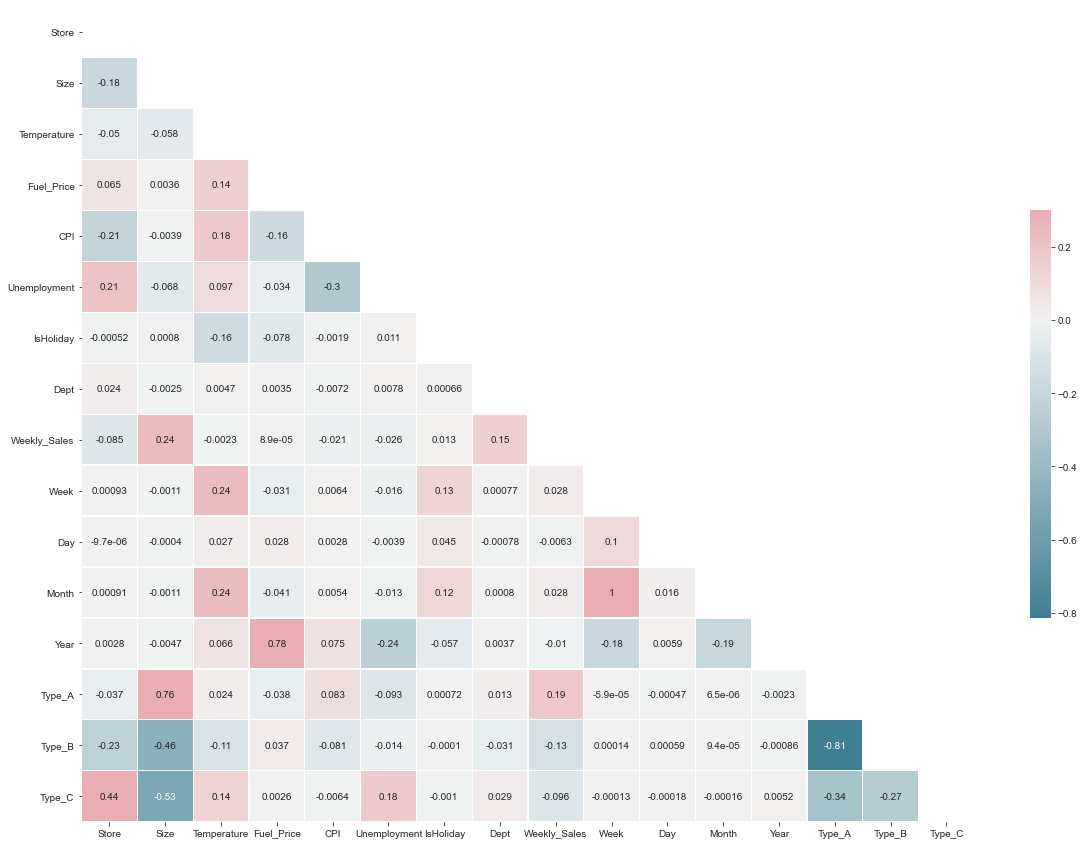

In [22]:
sns.set_style('ticks')
corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

f,ax = plt.subplots(figsize=(20,15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

fig = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            linewidths=.2, cbar_kws={"shrink": .5})

Now, we save the clean dataset to use it with the ML algorithms.

In [23]:
data.to_csv('data/walmart_clean.csv', index=None)